<Font color = 'Orange'>**HEART DISEASE PREDICTION**</Font>

Dataset link

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data = data.drop_duplicates()

<Font color = 'Orange'>**Working on Categorical Values**</Font>

In [5]:
cat_val = []
num_val = []
for column in data.columns:
    if(data[column].nunique()<=10):
        cat_val.append(column)
    else:
        num_val.append(column)


In [6]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [7]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [8]:
cat_val.remove('sex')
cat_val.remove('target')

In [9]:
data = pd.get_dummies(data,columns=cat_val, drop_first=True)

In [10]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


<Font color = 'Orange'>**Feature Scaling**</Font>

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data[num_val] = ss.fit_transform(data[num_val])
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [12]:
X = data.drop('target',axis=1)
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [13]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

<Font color='Orange'>**Splitting train test data**</Font>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<Font color = 'Orange'>**Logistic Regression**</Font>

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7868852459016393

<Font color = 'Orange'>**Support Vector Classifier**</Font>

In [17]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred1 = svm.predict(X_test)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [18]:
accuracy_score(y_test,y_pred1)

0.8032786885245902

<Font color = 'Orange'>**K Neighbors Classifier**</Font>

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,y_train)
y_pred2 = knc.predict(X_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [20]:
alfa = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred3 = knn.predict(X_test)
    alfa.append(accuracy_score(y_test, y_pred3))
alfa

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180

In [21]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [22]:
data = pd.read_csv("heart.csv")

In [23]:
data = data.drop_duplicates()

In [24]:
X = data.drop('target',axis=1)
y = data['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<Font color = 'Orange'>**Decision Tree Classifier**</Font>

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred3 = dtc.predict(X_test)
y_pred3

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [27]:
accuracy_score(y_test, y_pred3)

0.7213114754098361

<Font color = 'Orange'>**Random Forest Classifier**</Font>

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
y_pred4

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [29]:
accuracy_score(y_test, y_pred4)

0.8360655737704918

<Font color = 'Orange'>**Gradient Boosting Classifier**</Font>

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred5 = gbc.predict(X_test)
y_pred5

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [31]:
accuracy_score(y_test,y_pred5)

0.8032786885245902

In [32]:
Final_Data = pd.DataFrame({'Models':['LR', 'SVM', 'KNN', 'DT', 'RFC', 'GBC'], 'Accuracy':[accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred1), accuracy_score(y_test,y_pred2),
 accuracy_score(y_test,y_pred3), accuracy_score(y_test,y_pred4), accuracy_score(y_test,y_pred5)]})

In [33]:
Final_Data

,Models,Accuracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.721311
4,RFC,0.836066
5,GBC,0.803279


<Font color = 'Orange'>**Comparison of Accuracy**</Font>

<Axes: xlabel='Models', ylabel='Accuracy'>

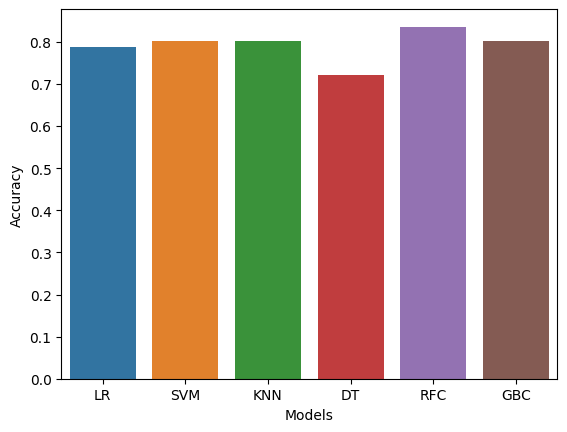

In [34]:
import seaborn as sns
sns.barplot(x = 'Models', y = 'Accuracy', data= Final_Data)


<Font color = 'Orange'>**Confusion Matrix**</Font>

In [35]:
import matplotlib.pyplot as plt

In [36]:
from sklearn.metrics import confusion_matrix
cmatlr = confusion_matrix(y_test, y_pred)
cmatsvm = confusion_matrix(y_test, y_pred1)
cmatknn = confusion_matrix(y_test, y_pred2)
cmatdt = confusion_matrix(y_test, y_pred3)
cmatrfc = confusion_matrix(y_test, y_pred4)
cmatgbc = confusion_matrix(y_test, y_pred5)

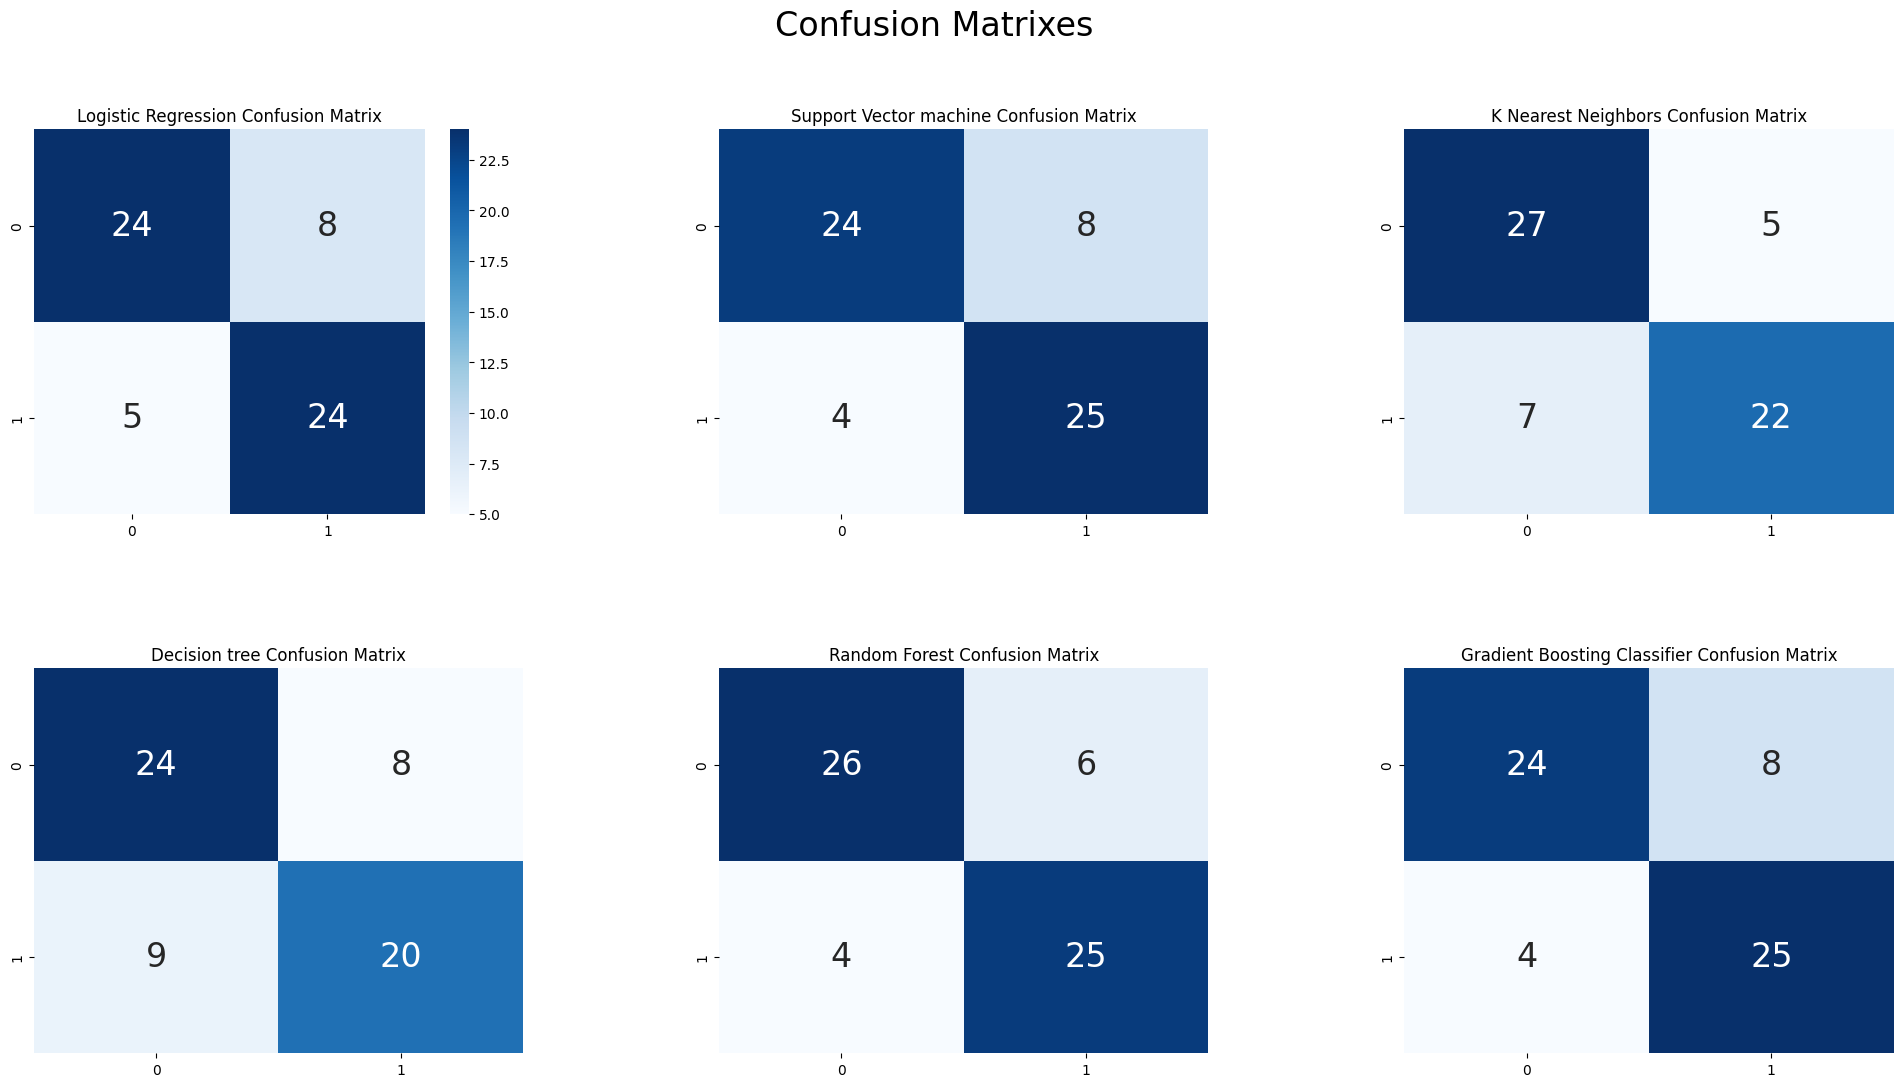

In [42]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cmatlr,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector machine Confusion Matrix")
sns.heatmap(cmatsvm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmatknn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision tree Confusion Matrix")
sns.heatmap(cmatdt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cmatrfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Gradient Boosting Classifier Confusion Matrix")
sns.heatmap(cmatgbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.show()

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = data.drop('target',axis=1)
y = data['target']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
new_data = pd.DataFrame({
    'age':55,
    'sex':1,
    'cp':0,
    'trestbps':145,
    'chol':200,
    'fbs':0,
    'restecg':1,
    'thalach':150,
    'exang':0,
    'oldpeak':2.5,
    'slope':2,
    'ca':1,
    'thal':2
}, index =[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,1,0,145,200,0,1,150,0,2.5,2,1,2


<Font color = 'Orange'>**Saving model using Joblib**</Font>

In [ ]:
import joblib
joblib.dump(rf, 'model_heart')


['model_heart']

In [ ]:
model = joblib.load('model_heart')

In [ ]:
result = model.predict(new_data)

<Font color= 'Orange'>**Prediction**</Font>

In [ ]:
if(result[0]==0):
    print("No Heart Disease")
else:
    print("Possibility of Heart Disease")

No Heart Disease
